## Backtesting a MACD, Parabolic SAR and Stochastic Trading Strategy Using Python
## here is a link to his video: https://www.youtube.com/watch?v=sbKTRVWppZY

### Buy Conditions:
#### MACD crosses above the signal line, this signals upwards momentum
#### the price is above the parabolic SAR, this indicates ithe market is on a uptrend
#### stochastic - Both K and D line should be above 20 and below 80. If K and D line both hit below 20 (Buy signal)

### Sell conditions 
#### MACD crosses belove the signal line, this signals downward momentum 
#### price is below the parabolic SAR, this signals downtrending market
#### stochastic - K and KD line should be between 20 and 80. If K and D line hit above 80 (Sell signal)



In [137]:
!pip install ta

In [138]:
import yfinance as yf
import numpy as np 
import ta
import pandas as pd

In [139]:
df = yf.download('ETC-USD', start='2021-09-28', interval='30m') 

[*********************100%***********************]  1 of 1 completed


In [140]:
# I will calculate the technical indicators 
df['macd']= ta.trend.macd_diff(df.Close)

In [141]:
df['%K'] = ta.momentum.stoch(df.High, df.Low, df.Close, window=14, smooth_window=3)

In [142]:
df['%D'] = df['%K'].rolling(3).mean()

In [143]:
df['psarup'] = ta.trend.psar_up(df.High, df.Low, df.Close, step=0.03, max_step=0.2)

In [144]:
df['psardown'] = ta.trend.psar_down(df.High, df.Low, df.Close, step=0.03, max_step=0.2)


In [145]:
df.dropna(subset = ['macd', '%K', '%D'], inplace=True)

In [146]:
df.head(20)


,Open,High,Low,Close,Adj Close,Volume,macd,%K,%D,psarup,psardown
Datetime,,,,,,,,,,,
2021-09-28 15:30:00+00:00,45.464428,45.715370,45.335407,45.432842,45.432842,2916096,-0.148613,4.512688,10.591929,NaN,48.338421
2021-09-28 16:00:00+00:00,45.365993,45.794289,45.231304,45.729939,45.729939,8703424,-0.133758,14.713268,10.325952,NaN,48.158240
2021-09-28 16:30:00+00:00,45.764839,45.839554,45.122185,45.122185,45.122185,2929344,-0.157006,0.000000,6.408652,NaN,47.894816
2021-09-28 17:00:00+00:00,45.126877,45.286266,44.881798,45.154350,45.154350,5295488,-0.161721,7.290389,7.334552,NaN,47.562100
2021-09-28 17:30:00+00:00,45.208202,45.266075,45.004784,45.209835,45.209835,4739904,-0.152715,8.774527,5.354972,NaN,47.160055
2021-09-28 18:00:00+00:00,45.232040,45.241535,44.873756,45.241535,45.241535,7652288,-0.136752,10.383499,8.816139,NaN,46.818316
2021-09-28 18:30:00+00:00,45.246719,45.620865,45.218483,45.482243,45.482243,7899584,-0.103615,22.865223,14.007750,NaN,46.468295
2021-09-28 19:00:00+00:00,45.469311,45.695095,45.469311,45.672478,45.672478,32681600,-0.064435,34.760348,22.669690,NaN,46.181278
2021-09-28 19:30:00+00:00,45.662823,45.664646,45.220631,45.466602,45.466602,6089344,-0.048654,27.486183,28.370585,NaN,45.945924


In [147]:
buyconditions = [
    (df['psarup'] < df['Low']), 
    (df['psarup'] > df['Low']) 
]



In [148]:
buyvalues = [1, 0]

In [149]:
df['buysignal'] = np.select(buyconditions,buyvalues)

In [150]:
sellconditions = [
    (df['psardown'] > df['High']), 
    (df['psardown'] < df['High'])
]
sellvalues = [1, 0]
df['sellsignal'] = np.select(sellconditions,sellvalues)

In [151]:
def gettriggers(df, lags, buy=True):
    df2 = pd.DataFrame()
    for i in range(1, lags+1):
        if buy:
            mask= (df['%K'].shift(i) < 25) & (df['%D'].shift(i) < 25)
        else: 
            mask= (df['%K'].shift(i) > 75) & (df['%D'].shift(i) > 75)
        df2 = df2.append(mask,ignore_index=True)
    return df2.sum(axis=0)

In [152]:
df['Buytrigger'] = np.where(gettriggers(df, 3),1,0) # if we get a buy signal (sum is larger than 0) we get a 1, if we dont we get a 0.

In [153]:
df['Selltrigger'] = np.where(gettriggers(df,3, False),1,0)

In [154]:
df['Buy'] = np.where((df.buysignal) & (df.Buytrigger) & (df.macd > 0),1,0)

In [155]:
df['Sell'] = np.where((df.sellsignal) & (df.Selltrigger) & (df.macd < 0),1,0)

In [156]:
Buying_dates, Selling_dates = [], []

In [157]:
for i in range(len(df) - 1): 
    if df.Buy.iloc[i]: # checking if each row has a buy signal
        Buying_dates.append(df.iloc[i +1].name) # if condition is met, you buy at the next timepoint (next row)
        for num,j in enumerate(df.Sell[i:]): # checking from the buying date if the selling conditions are fulfilled.
            if j: # j is the signal if its 1 or 0 
                Selling_dates.append(df.iloc[i + num + 1].name) # i + num because num is the number of iterations.
                break

In [158]:
cutoff =len(Buying_dates) - len(Selling_dates)

In [159]:
if cutoff:
    Buying_dates = Buying_dates[:-cutoff] # removing the buying dates if the selling conditions have not been fulfilled.

In [160]:
frame = pd.DataFrame({'Buying_dates':Buying_dates, 'Selling_dates': Selling_dates})

In [161]:
frame.head(10) # as you can see, there are overlapping buying dates, we will eliminate this buy check if the buying date is greater than the selling date of the previous row. 


,Buying_dates,Selling_dates
0,2021-09-29 23:30:00+00:00,2021-09-30 08:00:00+00:00
1,2021-09-30 00:00:00+00:00,2021-09-30 08:00:00+00:00
2,2021-10-04 08:00:00+00:00,2021-10-04 16:00:00+00:00
3,2021-10-04 08:30:00+00:00,2021-10-04 16:00:00+00:00
4,2021-10-08 15:30:00+00:00,2021-10-09 09:30:00+00:00
5,2021-10-15 03:30:00+00:00,2021-10-16 13:00:00+00:00
6,2021-10-15 14:30:00+00:00,2021-10-16 13:00:00+00:00
7,2021-10-16 09:00:00+00:00,2021-10-16 13:00:00+00:00
8,2021-10-16 09:30:00+00:00,2021-10-16 13:00:00+00:00
9,2021-10-18 10:00:00+00:00,2021-10-20 21:00:00+00:00


In [162]:
actuals = frame[frame.Buying_dates > frame.Selling_dates.shift(1)]

In [163]:
actuals

,Buying_dates,Selling_dates
2,2021-10-04 08:00:00+00:00,2021-10-04 16:00:00+00:00
4,2021-10-08 15:30:00+00:00,2021-10-09 09:30:00+00:00
5,2021-10-15 03:30:00+00:00,2021-10-16 13:00:00+00:00
9,2021-10-18 10:00:00+00:00,2021-10-20 21:00:00+00:00
15,2021-10-22 21:00:00+00:00,2021-10-25 07:00:00+00:00
17,2021-10-28 02:30:00+00:00,2021-10-28 19:00:00+00:00
18,2021-11-03 00:00:00+00:00,2021-11-05 08:00:00+00:00
20,2021-11-05 14:00:00+00:00,2021-11-06 07:30:00+00:00
22,2021-11-07 10:30:00+00:00,2021-11-09 08:00:00+00:00
24,2021-11-12 18:00:00+00:00,2021-11-13 10:30:00+00:00


In [164]:
def profitcalc():
    Buyprices = df.loc[actuals.Buying_dates].Open
    Sellprices = df.loc[actuals.Selling_dates].Open
    return (Sellprices.values - Buyprices.values)/Buyprices.values

In [165]:
profits = profitcalc()

In [166]:
profits

array([-0.0178614 , -0.01392369, -0.04189556,  0.04414235,  0.02274736,
        0.03904945, -0.03182775, -0.01825313,  0.12491773, -0.00019844,
       -0.01256676, -0.03610834, -0.01152533])

In [167]:
profits.mean() 

0.0035920381054843444

In [168]:
(profits +1).prod()

1.035496638552549

In [169]:
import matplotlib.pyplot as plt 

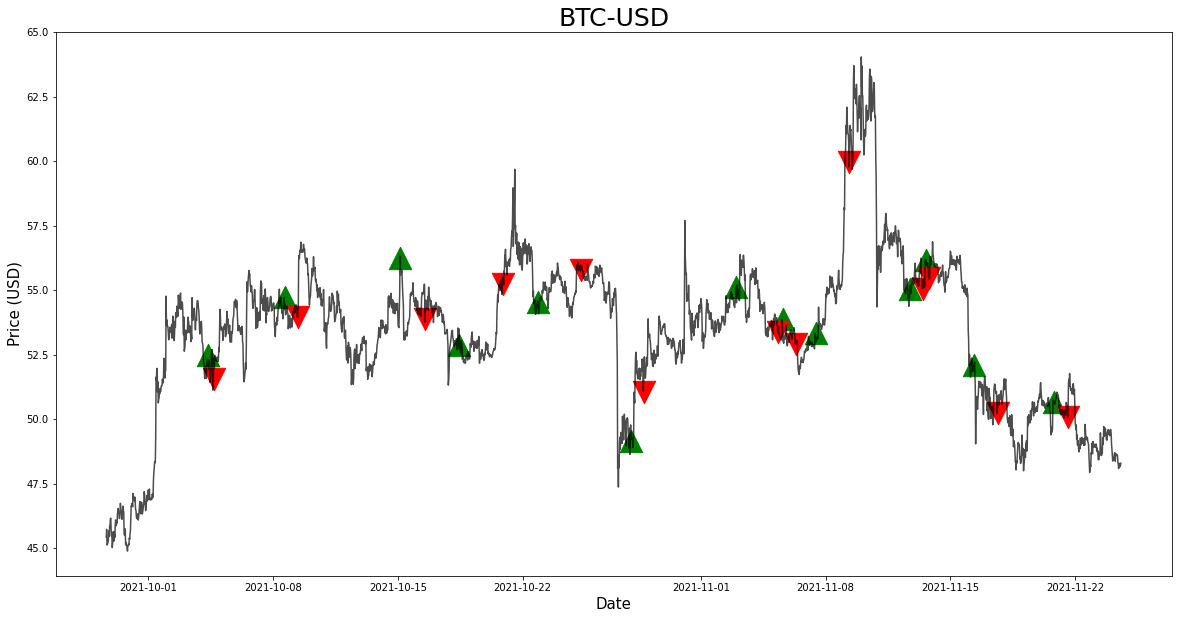

In [170]:
plt.figure(figsize=(20,10))
plt.plot(df.Close, color='k',alpha=0.7)
plt.scatter(actuals.Buying_dates, df.Open[actuals.Buying_dates], marker='^', color='g', s=500)
plt.scatter(actuals.Selling_dates, df.Open[actuals.Selling_dates], marker='v', color='r', s=500)
plt.title(label= 'BTC-USD',fontsize=25)
plt.ylabel(ylabel= 'Price (USD)', fontsize=15)
plt.xlabel(xlabel='Date', fontsize=15)
plt.show()